In [4]:
# Imports
from storm.utils import Storm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import time

## Storm Run

In [5]:
# Shared Variables and Functions
user = '1241528689'

# Playlist Inputs
output_playlist = {'daily':'7fnvajjUoWBQDo8iFNMH3s',
                   'archive':'1Q8WS7Xj51WCHZctXGDsrp'}

# Inputs
inputs = {'Much Needed':'7N3pwZE1N38wcdiuLxiPvq',
                  'Room on the Boat':'1SZS16UcW0XOzgh6UWXA9S',
                  'Refuge':'3K9no6AflSDYiiMzignAm7',
                  'Safety':'0R1gw1JbcOFD0r8IzrbtYP',
                  'Shelter from the Storm':'2yueH0i9C2daBRawYIc9P8',
                  'Soundtracked':'37i9dQZF1DWW7gj0FcGEx6',
                  'Soundtrack for Study':'0hZNf3tcMT4x03FyjKYJ3M',
                  'Film Music - Movie Scores':'5GhatXsZVNYxrhqEAfZPLR',
                  'Video Game Soundtracks':'3Iwd2RiXCzmm1AMUpRAaHO',
                  'Video Game Music Unofficial':'3aI7ztMmDhMHhYe1KOPFLG'}

In [8]:
# Authorized spotipy object
storm = Storm(user, inputs, output_playlist['daily'], output_playlist['archive'], 'instrumental', start_date='2020-10-21')

storm.Run()

Generating Token and Authenticating. . .
Authentication Complete.

Reading in existing Data.
Storm Arists Found! Reading in now.
Done! 1482 Unique Artists found.


Previously Discovered Albums Found! Reading in now.
Done! 48290 Albums found.

Augmenting new Artists from playlist input dictionary.
Obtaining a list of Tracks from Playlist . . .Much Needed
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Room on the Boat
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Refuge
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Safety
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Shelter from the Storm
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Soundtracked
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Soundtrack for Study
Finding Artists . . .
Obtaining a list of Tracks from Playlist . . .Film Music - Movie Scores
Finding Artists . . .
Obtaining a list of Tracks from 

Saving Artist Ids.
Obtaining all albums from the list of artists. (Albums)


Albums being tracked: 32348
Obtaining all albums from the list of artists. (Singles)


C:\Users\AC56874\Documents\GitHub\Storm\storm\utils.py:398: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  self.albums = pd.concat([self.albums, response_df], axis=0)


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

## Post-run Metrics

In [6]:
# Plots and Processing
df = storm.mdf

df['track_added_sum'] = df.tracks_added.cumsum()
df['track_elig_sum'] = df.tracks_eligible.cumsum()

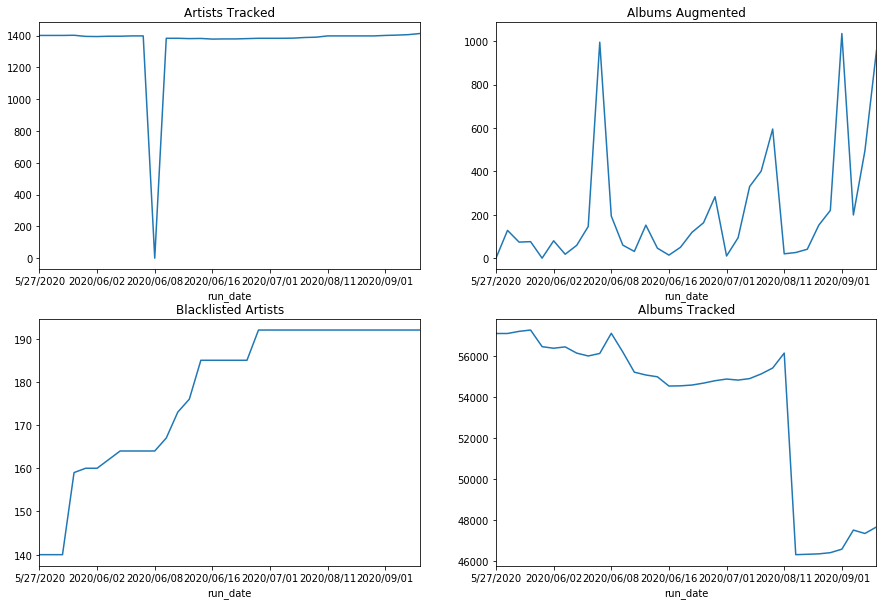

In [7]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10));
df.artists_tracked.plot(ax=ax[0][0]).set_title("Artists Tracked");
df.blacklisted_artists.plot(ax=ax[1][0]).set_title("Blacklisted Artists");
df.albums_augmented.plot(ax=ax[0][1]).set_title("Albums Augmented");
df.albums_tracked.plot(ax=ax[1][1]).set_title("Albums Tracked");

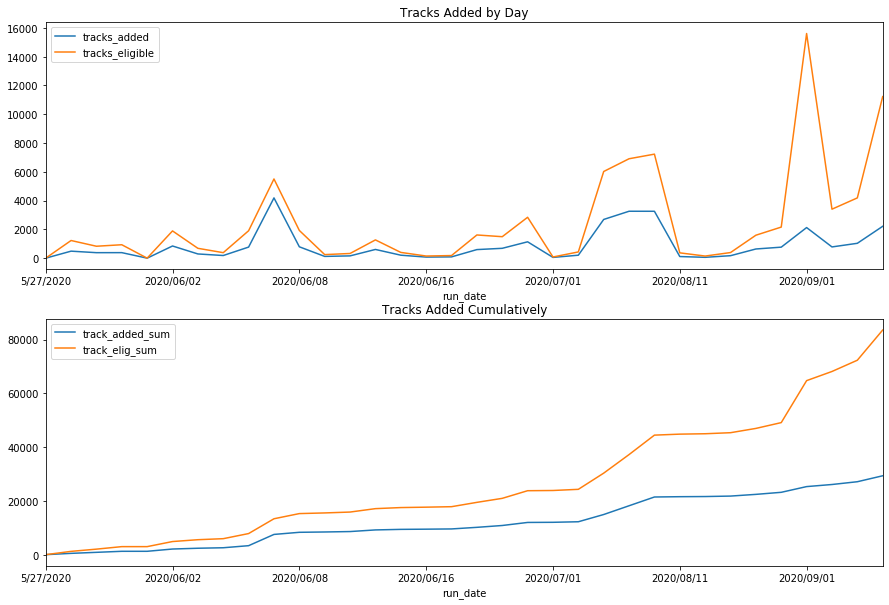

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10));
df[['tracks_added', 'tracks_eligible']].plot(ax=ax[0]).set_title('Tracks Added by Day');
df[['track_added_sum', 'track_elig_sum']].plot(ax=ax[1]).set_title('Tracks Added Cumulatively');